# PYBER RIDE SHARING


## ANALYSIS

* Expectedly, two thirds of the rides and fares come from urban cities
* Although rural drivers collect a higher average fare it would be helpful   if we had more data to see where the most profitable drivers are.
* Riders tend to take shorter trips in urban locations thus the drivers     will be able to give more rides. Since most incetives are based on number of rides given, this is why we find 85 percent of drivers in urban locations. 

In [10]:
#import libraries and read the files

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn 

City = pd.read_csv('city_data.csv')
Rides = pd.read_csv('ride_data.csv')

#merge the data

Full_Data = pd.merge(Rides, City, how="left", on=["city", "city"])
Full_Data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [2]:
# testing = Full_Data.sort_values('driver_count',ascending=False )
# testing.head(100)

#Full_Data.type.unique()

In [3]:
#BUBBLE PLOT OF RIDE SHARING DATA

#print(plt.style.available)

In [4]:
#splitting up the data into city types
Rural = Full_Data[Full_Data["type"] == "Rural"]
Suburban= Full_Data[Full_Data["type"] == "Suburban"]
Urban= Full_Data[Full_Data["type"] == "Urban"]

#Rural.head(50)

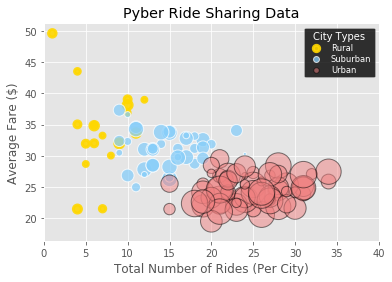

In [5]:
#getting stats 
rural_avg_fare = Rural.groupby(["city"]).mean()["fare"]
rural_drivers = Rural.groupby(["city"]).mean()["driver_count"]
rural_rides = Rural.groupby(["city"]).count()["ride_id"]

suburban_avg_fare = Suburban.groupby(["city"]).mean()["fare"]
suburban_drivers = Suburban.groupby(["city"]).mean()["driver_count"]
suburban_rides = Suburban.groupby(["city"]).count()["ride_id"]

urban_avg_fare = Urban.groupby(["city"]).mean()["fare"]
urban_drivers = Urban.groupby(["city"]).mean()["driver_count"]
urban_rides = Urban.groupby(["city"]).count()["ride_id"]


#creating plot
plt.style.use('ggplot')


plt.scatter(rural_rides, rural_avg_fare, 
            s=8*rural_drivers, c="gold", 
            alpha=.9,linewidths=3, marker="o", 
            label="Rural")

plt.scatter(suburban_rides, suburban_avg_fare, 
            s=9*suburban_drivers, c="lightskyblue", 
            alpha=0.75, edgecolor="white", linewidths=1, marker="o", 
            label="Suburban")

plt.scatter(urban_rides, urban_avg_fare, 
            s=10*urban_drivers, c="lightcoral", 
            alpha=0.5, edgecolor="black", linewidths=1, marker="o", 
            label="Urban")


#I noticed an outlier from the suburban group (rides) 
#It turned out to be that issue that others were having with the Merge function. 


#labels
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.xlim((0,40))

plt.style.use('dark_background')

#legend

lgnd = plt.legend(title="City Types",bbox_to_anchor=(1, 1),
                  fontsize="small", mode="tight", 
                  labelspacing=0.25
                 )

lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [30]

## TOTAL FARES BY CITY TYPE

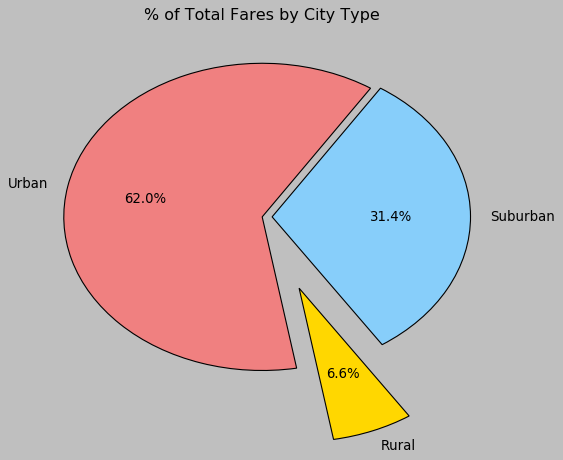

In [6]:
Rural_pct = 100 * Full_Data.groupby(["type"]).sum()["fare"] / Full_Data["fare"].sum()

plt.style.use('classic')


# chart
plt.pie(Rural_pct, autopct='%.1f%%',
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode=[.5, .05, 0], 
        startangle=280,
        shadow=False, 
        )
plt.title("% of Total Fares by City Type")

#plt.tight_layout()
plt.show()

## Total Rides by City Type

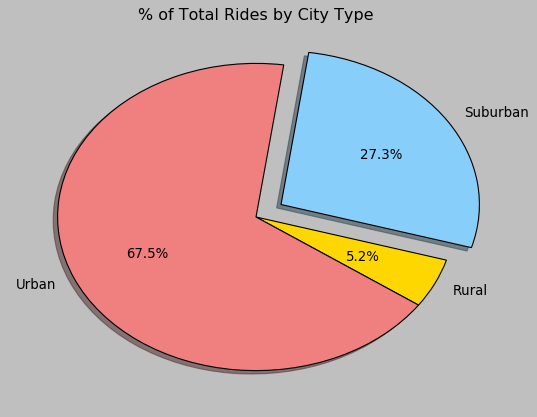

In [7]:
Rides_pct = 100 * Full_Data.groupby(["type"]).count()["ride_id"] / Full_Data["ride_id"].count()

plt.style.use('fast')

plt.pie(Rides_pct, autopct='%.1f%%',
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode=[0, .15, 0], 
        startangle=325,
        shadow=True
       )
plt.title("% of Total Rides by City Type")

plt.show()

## Total Drivers by City Type

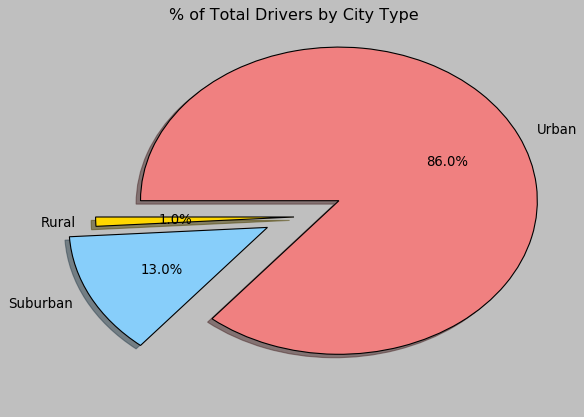

In [8]:
Drivers_pct = 100 * Full_Data.groupby(["type"]).sum()["driver_count"] / Full_Data["driver_count"].sum()

plt.pie(Drivers_pct, autopct='%.1f%%',
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode=[.0, .15,.25 ], 
        startangle=180,
        shadow=True
       )
plt.title("% of Total Drivers by City Type")

plt.show()